<a href="https://colab.research.google.com/github/GioLomia/Machine_Learning_From_Scratch/blob/master/Linear_Regression_from_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creating Linear Regression Algorithm from scratch.
**equation of a line: y=mx+b**

I am going to create a regression algorithm in pure python and numpy, from scratch. Using only math and my understanding of the theory behind it.
<br/> *Also Credit: SantDex for helpful video tutorials.*
<br/>Material to understand the concepts covered in this notebook: 
    [how to calculate linear regression slope and intercept](https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/regression-analysis/find-a-linear-regression-equation/#FindaLinear)

In [0]:
from statistics import mean
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib import style

In [0]:
xs =np.array(random.sample(range(1, 200), 50),dtype=np.float64) #Generate unique data points.
ys = np.array([(0.66478*i+23.6123)-random.uniform(-17.5,17.5) for i in xs ],dtype=np.float64) #create the formula for the equation with some introduced noise.

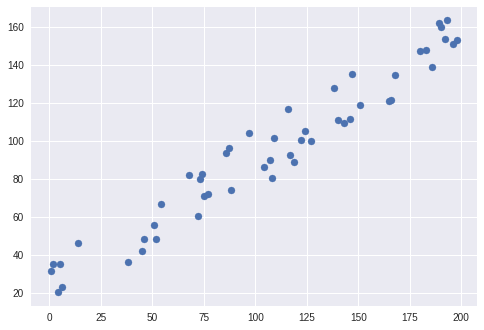

In [3]:
#Plotting the data points.
plt.scatter(xs,ys)
plt.show()

In [0]:
class LinearReg:
    def __init__(self,x,y,multi_var=False):
        self.m=0
        self.b=0
        self.x=x
        self.y=y
        self.multy_var=multi_var
#Function To calculate the slope and intercept of the line of the best fit
    def reshape(self):
        x_final=[]
        for var in range(len(self.x[0])):
            x_inter=[]
            for x in self.x:
                x_inter.append(x[var])
            np.array(x_final.append(x_inter))
        self.x=np.array(x_final)
        
    def fit_multiple(self):
        self.reshape()
        m_m=[]
        b_m=[]
        m_count=0
        for i in self.x:
            
            m_m.append(((mean(i)*mean(self.y))-mean(i*self.y))/((mean(i)**2)-mean(i**2)))
            b_m.append(mean(self.y)-m_m[m_count]*mean(i))
            m_count+=1
        self.m=m_m
        self.b=b_m
    def fit_singular(self):
        y=self.y
        x=self.x
        self.m=((mean(x)*mean(y))-mean(x*y))/((mean(x)**2)-mean(x**2))
        self.b=mean(y)-self.m*mean(x)
        
        
    def fit(self):
        if self.multy_var==True:
            self.fit_multiple()
        else:
            self.fit_singular()
            
    def predict(self,val):
        if type(val)!=list:
            return self.m*val+self.b
        else: 
            return [i*self.m + self.b for i in val]
    def s_error(self):
        return sum([((self.predict(self.x[i])-self.y[i])**2) for i in range(len(self.x))])
    def mean_error(self):
        return sum([((self.predict(self.x[i])-mean(self.y))**2) for i in range(len(self.x))])
    def accuracy(self):
        y_mean_line=mean(self.y)
        return 1-self.s_error()/self.mean_error()
    def extract_coef(self):
        return (self.m,self.b)

In [5]:

model=LinearReg(xs,ys) #initialize the model and pass in the data
model.fit() # generate the line of best fit according to the model

print('Accuracy: '+ str(model.accuracy()))
pred_set=np.array([30,82,45,201])
prediction=model.predict(pred_set) #predict the data points 

Accuracy: 0.9407204325199592


In [0]:
extension=np.linspace(0,210,210)
pred_line=extension*model.m+model.b

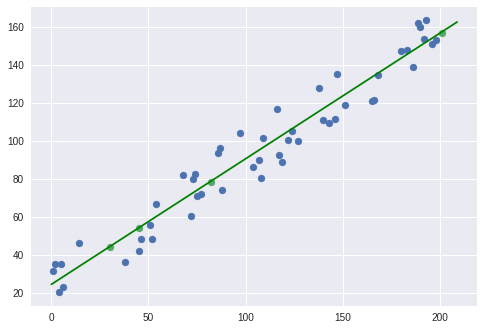

In [7]:

plt.scatter(xs,ys)
plt.plot(pred_line,'-g')
plt.scatter(pred_set,prediction)
plt.show()

# Linear Regression For Multy Variable Data Sets
Sources Used: [Multiple Linear Regression](http://mezeylab.cb.bscb.cornell.edu/labmembers/documents/supplement%205%20-%20multiple%20regression.pdf)


In [0]:
multy_xs =[[random.randint(0,250) for i in range(2)] for j in range(525)] #Generate unique data points with 2 dimensions.
multy_ys = np.array([(0.66478*i[0]-random.uniform(-20.5,20.5)+0.8491*i[1]-random.uniform(-20.5,20.5)+23.6123)for i in multy_xs ],dtype=np.float64) 

In [0]:
#Seperating Variable 1 from variable 2
x_ax=[]
z_ax=[]
for i in multy_xs:
    x_ax.append(i[0])
    z_ax.append(i[1])

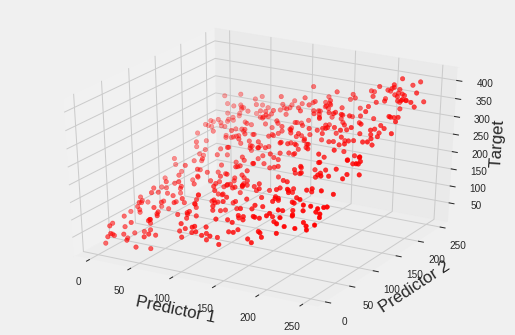

In [80]:
#Plotting the data points.
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X,Y,Z=x_ax,multy_ys,z_ax
ax.scatter(X,Z,Y,c='red')
ax.set_xlabel('Predictor 1')
ax.set_ylabel('Predictor 2')
ax.set_zlabel('Target')
plt.show()

In [81]:
multiModel=LinearReg(multy_xs,multy_ys,multi_var=True)

multiModel.fit()#Fiting the plane onto the dataset
coef=multiModel.extract_coef()#extracting our coeficients
coef


([0.6773139777175355, 0.8577540418988171],
 [132.4183950307975, 106.43237084054203])

In [0]:
#Setup plotting
def f(x,y):
    return x*coef[0][0]+y*coef[0][1]#+coef[1][0]

x_path=np.linspace(0,250,250)
y_path=np.linspace(0,250,250)
X, Y = np.meshgrid(x_path, y_path)
Z = np.array(f(X, Y))


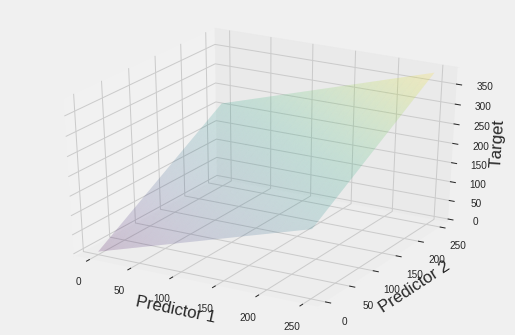

In [90]:
#Plotting the Model.
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
style.use('fivethirtyeight')
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
pr_1,target,pr_2=x_ax,multy_ys,z_ax
ax.plot_surface(X, Y, Z, alpha=0.2,cmap='viridis',rstride=1, shade=True)#plotting the model
ax.set_xlabel('Predictor 1')
ax.set_ylabel('Predictor 2')
ax.set_zlabel('Target')
plt.show()

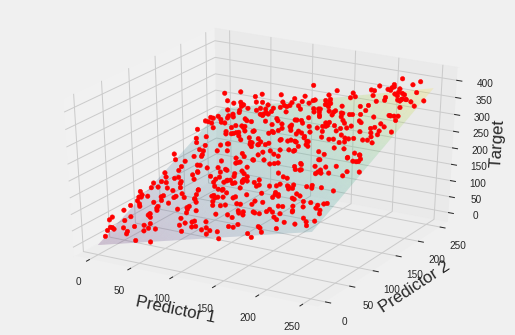

In [83]:
#Plotting the data and the model points.
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
style.use('fivethirtyeight')
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
pr_1,target,pr_2=x_ax,multy_ys,z_ax
ax.plot_surface(X, Y, Z, alpha=0.2,cmap='viridis',rstride=1)#plotting the model
ax.scatter(pr_1,pr_2,target,alpha=1,c='red')
ax.set_xlabel('Predictor 1')
ax.set_ylabel('Predictor 2')
ax.set_zlabel('Target')
plt.show()
